# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import sys
sys.path.append("../")

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
print("Beginning Data Retrieval")
print("-------------------------")
base_url = "http://api.openweathermap.org/data/2.5/weather"
query_params = {}
query_params['appid'] = weather_api_key
query_params['units'] = 'imperial'
print(weather_api_key)
i = 0
cols = ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
df = pd.DataFrame()
for city in cities:
    try:
        query_params['q'] = city
        print(f"Processing Record {i} | {city}")
        response = requests.get(base_url, params=query_params)
        data = response.json()
        res_list = []
        res_list.append(city)
        res_list.append(data['coord']['lat'])
        res_list.append(data['coord']['lon'])
        res_list.append(data['main']['temp_max'])
        res_list.append(data['main']['humidity'])
        res_list.append(data['clouds']['all'])
        res_list.append(data['wind']['speed'])
        res_list.append(data['sys']['country'])
        res_list.append(data['dt'])
        ser = pd.Series(res_list, index=cols)
        df = df.append(ser, ignore_index=True)
        i += 1
    except Exception as e:
        print(f"Error processing city {i} {city}...")

df.head()

Beginning Data Retrieval
-------------------------
af3b614283e3aa84cf172d6d0ea5f73a
Processing Record 0 | albany
Processing Record 1 | victor harbor
Processing Record 2 | cape town
Processing Record 3 | takayama
Processing Record 4 | morant bay
Processing Record 5 | taolanaro
Error processing city 5 taolanaro...
Processing Record 5 | okhotsk
Processing Record 6 | mataura
Processing Record 7 | rikitea
Processing Record 8 | rio de janeiro
Processing Record 9 | hilo
Processing Record 10 | illoqqortoormiut
Error processing city 10 illoqqortoormiut...
Processing Record 10 | ligatne
Processing Record 11 | barrow
Processing Record 12 | punta arenas
Processing Record 13 | cabedelo
Processing Record 14 | belushya guba
Error processing city 14 belushya guba...
Processing Record 14 | rio grande
Processing Record 15 | yumen
Processing Record 16 | vaini
Processing Record 17 | ushuaia
Processing Record 18 | aklavik
Processing Record 19 | geraldton
Processing Record 20 | narsaq
Processing Record 21 |

Processing Record 208 | grand-bourg
Processing Record 209 | mingyue
Processing Record 210 | avera
Processing Record 211 | saint-philippe
Processing Record 212 | koumac
Processing Record 213 | alofi
Processing Record 214 | sitka
Processing Record 215 | general pico
Processing Record 216 | olavarria
Processing Record 217 | high rock
Processing Record 218 | lasa
Processing Record 219 | barentsburg
Error processing city 219 barentsburg...
Processing Record 219 | quang ngai
Processing Record 220 | palmas
Processing Record 221 | kudahuvadhoo
Processing Record 222 | satitoa
Error processing city 222 satitoa...
Processing Record 222 | ornskoldsvik
Processing Record 223 | puerto ayora
Processing Record 224 | formoso do araguaia
Error processing city 224 formoso do araguaia...
Processing Record 224 | coquimbo
Processing Record 225 | kushmurun
Processing Record 226 | anadyr
Processing Record 227 | mahebourg
Processing Record 228 | the pas
Processing Record 229 | katsuura
Processing Record 230 | p

Processing Record 428 | canavieiras
Processing Record 429 | umm durman
Error processing city 429 umm durman...
Processing Record 429 | aykhal
Processing Record 430 | maragogi
Processing Record 431 | ngunguru
Processing Record 432 | edd
Processing Record 433 | valparaiso
Processing Record 434 | kahului
Processing Record 435 | fairbanks
Processing Record 436 | viransehir
Processing Record 437 | marienburg
Processing Record 438 | karamea
Error processing city 438 karamea...
Processing Record 438 | oranjestad
Processing Record 439 | grand gaube
Processing Record 440 | progreso
Processing Record 441 | victoria point
Processing Record 442 | loughrea
Processing Record 443 | magadan
Processing Record 444 | siocon
Processing Record 445 | monster
Processing Record 446 | winneba
Processing Record 447 | zalari
Processing Record 448 | ous
Processing Record 449 | poltavka
Processing Record 450 | manokwari
Processing Record 451 | mehamn
Processing Record 452 | rocha
Processing Record 453 | klyuchi
Pr

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,100.0,US,1.622322e+09,72.0,42.6001,-73.9662,53.15,5.37
1,victor harbor,0.0,AU,1.622322e+09,70.0,-35.5667,138.6167,49.80,8.16
2,cape town,40.0,ZA,1.622321e+09,87.0,-33.9258,18.4232,58.08,0.07
3,takayama,70.0,JP,1.622321e+09,90.0,36.1333,137.2500,52.03,1.57
4,morant bay,11.0,JM,1.622322e+09,73.0,17.8815,-76.4093,85.62,8.84


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [66]:
df.to_csv('city_weather.csv', index=False)

In [67]:
def create_summary(data_frame):
    summary_df = pd.DataFrame()
    summary_df = summary_df.append(data_frame.count(), ignore_index=True)
    summary_df = summary_df.append(data_frame.mean(), ignore_index=True)
    summary_df = summary_df.append(data_frame.std(), ignore_index=True)
    summary_df = summary_df.append(data_frame.min(), ignore_index=True)
    first_qrt = data_frame.quantile(0.25)
    second_qrt  = data_frame.quantile(0.5)
    third_qrt = data_frame.quantile(0.75)
    summary_df = summary_df.append(first_qrt, ignore_index=True)
    summary_df = summary_df.append(second_qrt, ignore_index=True)
    summary_df = summary_df.append(third_qrt, ignore_index=True)
    summary_df = summary_df.append(data_frame.max(), ignore_index=True)
    del summary_df['City']
    del summary_df['Country']
    summary_df.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    return summary_df

summary_data_frame = create_summary(df)
summary_data_frame

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,564.000000,5.640000e+02,564.000000,564.000000,564.000000,564.000000,564.000000
mean,54.453901,1.622322e+09,70.010638,20.842793,23.314547,64.018812,7.961596
std,38.958734,8.757427e+01,22.037266,33.603027,89.861202,16.700461,5.479505
min,0.000000,1.622321e+09,6.000000,-54.800000,-175.200000,16.920000,0.000000
25%,12.750000,1.622322e+09,58.000000,-5.584075,-57.655225,51.770000,3.932500
50%,62.500000,1.622322e+09,77.000000,24.075000,25.120300,63.655000,6.590000
75%,95.000000,1.622322e+09,87.000000,50.127550,108.825000,78.570000,10.770000
max,100.000000,1.622322e+09,100.000000,78.218600,179.316700,102.700000,33.710000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [68]:
df_humidity = df[df['Humidity'] <= 100]
summary_data_frame = create_summary(df_humidity)
summary_data_frame

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,564.000000,5.640000e+02,564.000000,564.000000,564.000000,564.000000,564.000000
mean,54.453901,1.622322e+09,70.010638,20.842793,23.314547,64.018812,7.961596
std,38.958734,8.757427e+01,22.037266,33.603027,89.861202,16.700461,5.479505
min,0.000000,1.622321e+09,6.000000,-54.800000,-175.200000,16.920000,0.000000
25%,12.750000,1.622322e+09,58.000000,-5.584075,-57.655225,51.770000,3.932500
50%,62.500000,1.622322e+09,77.000000,24.075000,25.120300,63.655000,6.590000
75%,95.000000,1.622322e+09,87.000000,50.127550,108.825000,78.570000,10.770000
max,100.000000,1.622322e+09,100.000000,78.218600,179.316700,102.700000,33.710000


In [69]:
#  Get the indices of cities that have humidity over 100%.
df_over_humidity = df[df['Humidity'] > 100]
indices = df_over_humidity.index.values
indices

array([], dtype=int64)

In [70]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
lowerq = df['Humidity'].quantile(0.25)
upperq = df['Humidity'].quantile(0.75)
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
clean_city_data = df[(df['Humidity'] <= upper_bound) & (df['Humidity'] >= lower_bound)]
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,100.0,US,1.622322e+09,72.0,42.6001,-73.9662,53.15,5.37
1,victor harbor,0.0,AU,1.622322e+09,70.0,-35.5667,138.6167,49.80,8.16
2,cape town,40.0,ZA,1.622321e+09,87.0,-33.9258,18.4232,58.08,0.07
3,takayama,70.0,JP,1.622321e+09,90.0,36.1333,137.2500,52.03,1.57
4,morant bay,11.0,JM,1.622322e+09,73.0,17.8815,-76.4093,85.62,8.84
...,...,...,...,...,...,...,...,...,...
559,granada,73.0,ES,1.622322e+09,55.0,37.2500,-3.2500,68.29,5.53
560,college,75.0,US,1.622322e+09,44.0,64.8569,-147.8028,52.59,1.01
561,cleethorpes,0.0,GB,1.622322e+09,92.0,53.5605,-0.0323,59.09,6.76
562,opuwo,1.0,NA,1.622322e+09,28.0,-18.0607,13.8400,62.78,6.73


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

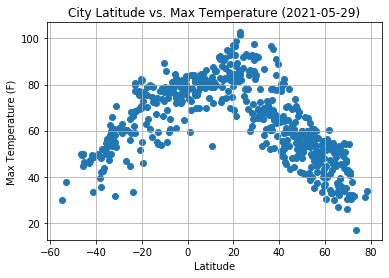

In [71]:
from datetime import date
x_values = df['Lat']
y_values = df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
date_run = df.iloc[0, 3]
date_run = date.fromtimestamp(date_run)
plt.title(f'City Latitude vs. Max Temperature ({date_run})')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

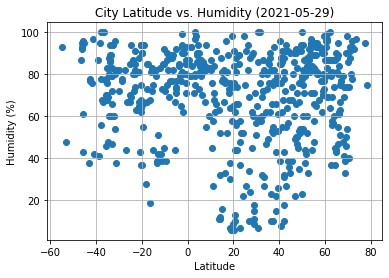

In [72]:
x_values = df['Lat']
y_values = df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date_run})')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

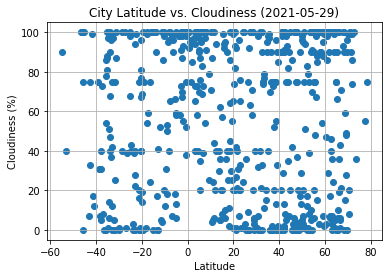

In [73]:
x_values = df['Lat']
y_values = df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date_run})')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

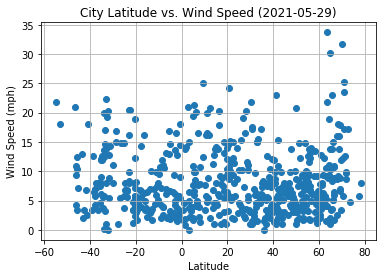

In [74]:
x_values = df['Lat']
y_values = df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date_run})')
plt.grid()
plt.show()

## Linear Regression

In [75]:
northern_df = df[df['Lat'] > 0]
southern_df = df[df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8248565280898089


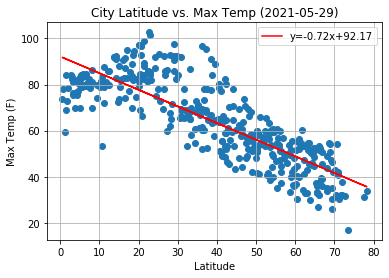

In [76]:
def plot_regression(lat_s, y_s, y_label, y_units):
    m_slope, m_int, m_r, m_p, m_std_err = linregress(lat_s, y_s)
    m_fit = m_slope * lat_s + m_int
    print(f"The r-value is {m_r}")
    plt.scatter(lat_s, y_s)
    plt.plot(lat_s, m_fit, color="r", label='y={:.2f}x+{:.2f}'.format(m_slope,m_int))
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label} ({y_units})')
    plt.title(f'City Latitude vs. {y_label} ({date_run})')
    plt.grid()
    plt.legend(loc='best')
    plt.show()
    
plot_regression(northern_df['Lat'], northern_df['Max Temp'], 'Max Temp', 'F')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7886478606631817


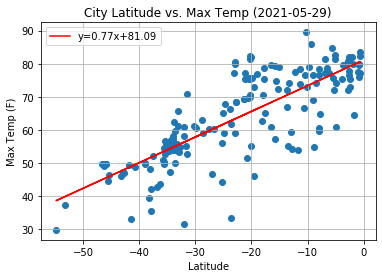

In [77]:
plot_regression(southern_df['Lat'], southern_df['Max Temp'], 'Max Temp', 'F')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.07845788466931627


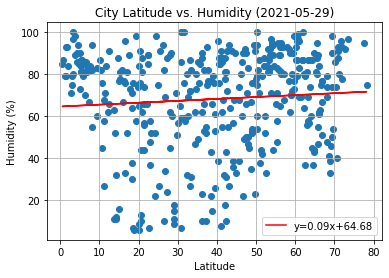

In [78]:
plot_regression(northern_df['Lat'], northern_df['Humidity'], 'Humidity', '%')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.033217158335201655


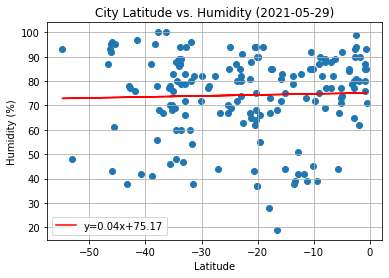

In [79]:
plot_regression(southern_df['Lat'], southern_df['Humidity'], 'Humidity', '%')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.06058878258145144


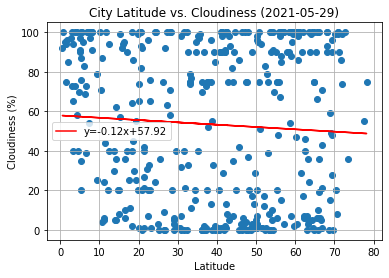

In [80]:
plot_regression(northern_df['Lat'], northern_df['Cloudiness'], 'Cloudiness', '%')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.12788457293445873


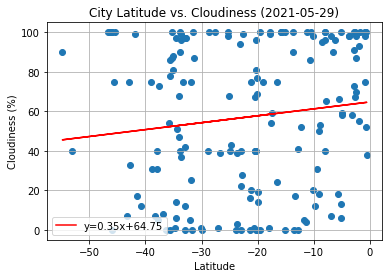

In [81]:
plot_regression(southern_df['Lat'], southern_df['Cloudiness'], 'Cloudiness', '%')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.03546871987429306


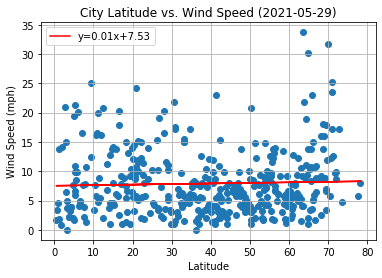

In [82]:
plot_regression(northern_df['Lat'], northern_df['Wind Speed'], 'Wind Speed', 'mph')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.2402914790037959


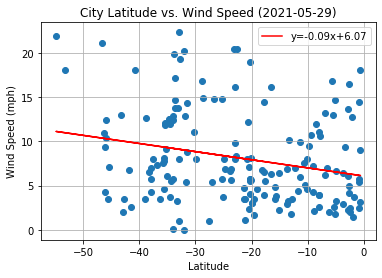

In [83]:
plot_regression(southern_df['Lat'], southern_df['Wind Speed'], 'Wind Speed', 'mph')